In [135]:
import pycaret
import pandas as pd

In [136]:
# อ่านไฟล์ CSV
data = pd.read_csv("export_data/export-pm25_eng-1h.csv", parse_dates=["timestamp"], index_col="timestamp")

In [137]:
data = data[['pm_2_5', 'humidity', 'temperature']]

In [138]:
data["year"] = data.index.year
data["month"] = data.index.month
data["day"] = data.index.day
data["day_of_week"] = data.index.dayofweek  # 0 = Monday, 6 = Sunday
data["week_of_year"] = data.index.isocalendar().week  # ค่าจะเป็น int64

In [139]:
# สมมติว่า data มี index เป็น datetime อยู่แล้ว
def assign_season(month):
    if month in [2, 3, 4]:  # ก.พ. - เม.ย.
        return "summer"        # ฤดูร้อน
    elif month in [5, 6, 7]:  # พ.ค. - ก.ค.
        return "early_rainy"   # ต้นฤดูฝน
    else:  # ส.ค. - ม.ค.
        return "late_rainy"    # ปลายฤดูฝน

season_mapping = {'summer': 0, 'early_rainy': 1, 'late_rainy': 2}
data["season"] = data.index.month.map(assign_season)
data['season'] = data['season'].map(season_mapping)

In [140]:
data['dew_point'] = data['temperature'] - ((100 - data['humidity']) / 5)

In [141]:
data["is_weekend"] = data.index.dayofweek.isin([5, 6]).astype(int)

In [142]:
# อัตราส่วนของอุณหภูมิต่อความชื้น
data["temp_humidity_ratio"] = data["temperature"] / (data["humidity"] + 1)

In [143]:
# ดัชนีความร้อน (Heat Index) หรืออุณหภูมิที่รับรู้
T = data["temperature"]
RH = data["humidity"]

data["heat_index"] = -42.379 + (2.04901523 * T) + (10.14333127 * RH) - (0.22475541 * T * RH) - \
                   (0.00683783 * T**2) - (0.05481717 * RH**2) + (0.00122874 * T**2 * RH) + \
                   (0.00085282 * T * RH**2) - (0.00000199 * T**2 * RH**2)

In [144]:
# ความชื้นสัมพัทธ์เชิงดัชนี
data["rh_index"] = data["humidity"] ** 2 / (data["temperature"] + 1)

In [145]:
import pandas as pd
import numpy as np

# สมมุติว่ามี DataFrame data ที่มีข้อมูลอยู่แล้ว

# เพิ่มฟีเจอร์ day_of_year
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data['day_of_year'] = data['date'].dt.dayofyear

# เพิ่มฟีเจอร์ month_sin และ month_cos
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)

# เพิ่มฟีเจอร์ day_of_week_sin และ day_of_week_cos
data['day_of_week_sin'] = np.sin(2 * np.pi * data['day_of_week'] / 7)
data['day_of_week_cos'] = np.cos(2 * np.pi * data['day_of_week'] / 7)

# เพิ่มฟีเจอร์ rolling average (ค่าเฉลี่ยเคลื่อนที่)
# data['pm_2_5_rolling_7'] = data['pm_2_5'].rolling(window=7).mean().shift(1)
# data['pm_2_5_rolling_10'] = data['pm_2_5'].rolling(window=10).mean().shift(1)
# data['pm_2_5_rolling_14'] = data['pm_2_5'].rolling(window=14).mean().shift(1)
# data['pm_2_5_rolling_18'] = data['pm_2_5'].rolling(window=18).mean().shift(1)
# data['pm_2_5_rolling_20'] = data['pm_2_5'].rolling(window=20).mean().shift(1)
# data['pm_2_5_rolling_24'] = data['pm_2_5'].rolling(window=24).mean().shift(1)
# data['pm_2_5_rolling_30'] = data['pm_2_5'].rolling(window=30).mean().shift(1)

data['pm_2_5_lag_1'] = data['pm_2_5'].shift(1)
data['pm_2_5_lag_2'] = data['pm_2_5'].shift(2)
data['pm_2_5_lag_3'] = data['pm_2_5'].shift(3)
data['pm_2_5_lag_4'] = data['pm_2_5'].shift(4)
data['pm_2_5_lag_5'] = data['pm_2_5'].shift(5)
data['pm_2_5_lag_6'] = data['pm_2_5'].shift(6)
data['pm_2_5_lag_7'] = data['pm_2_5'].shift(7)

data['humidity_rolling_2'] = data['humidity'].rolling(window=2).mean().shift(1)  # ค่าเฉลี่ย 2 วันของ PM 10
data['humidity_rolling_3'] = data['humidity'].rolling(window=3).mean().shift(1)  # ค่าเฉลี่ย 3 วันของ PM 10
data['humidity_rolling_5'] = data['humidity'].rolling(window=5).mean().shift(1)  # ค่าเฉลี่ย 5 วันของ PM 10
data['humidity_rolling_7'] = data['humidity'].rolling(window=7).mean().shift(1)  # ค่าเฉลี่ย 7 วันของ PM 10

data['humidity_lag_1'] = data['humidity'].shift(1)
data['humidity_lag_2'] = data['humidity'].shift(2)
data['humidity_lag_3'] = data['humidity'].shift(3)
data['humidity_lag_5'] = data['humidity'].shift(5)
data['humidity_lag_7'] = data['humidity'].shift(7)

data['temperature_rolling_2'] = data['temperature'].rolling(window=2).mean().shift(1)  # ค่าเฉลี่ย 2 วันของ PM 10
data['temperature_rolling_3'] = data['temperature'].rolling(window=3).mean().shift(1)  # ค่าเฉลี่ย 3 วันของ PM 10
data['temperature_rolling_5'] = data['temperature'].rolling(window=5).mean().shift(1)  # ค่าเฉลี่ย 5 วันของ PM 10
data['temperature_rolling_7'] = data['temperature'].rolling(window=7).mean().shift(1)  # ค่าเฉลี่ย 7 วันของ PM 10

data['temperature_lag_1'] = data['temperature'].shift(1)
data['temperature_lag_2'] = data['temperature'].shift(2)
data['temperature_lag_3'] = data['temperature'].shift(3)
data['temperature_lag_5'] = data['temperature'].shift(5)
data['temperature_lag_7'] = data['temperature'].shift(7)

# data.dropna(subset=["pm_2_5_rolling_30"], inplace=True)  # ลบแถวที่ไม่มีค่า PM2.5 Last Week
# data['humidity_rolling'] = data['humidity'].rolling(window=5).mean()  # ค่าเฉลี่ย 7 วันของความชื้น
# data['temperature_rolling'] = data['temperature'].rolling(window=5).mean()

# # ตรวจสอบว่า DataFrame พร้อมใช้งานแล้ว
# print(data.head())


In [146]:
data["temp_diff"] = data["temperature"].diff()
data["humidity_diff"] = data["humidity"].diff()

In [147]:
data.columns

Index(['pm_2_5', 'humidity', 'temperature', 'year', 'month', 'day',
       'day_of_week', 'week_of_year', 'season', 'dew_point', 'is_weekend',
       'temp_humidity_ratio', 'heat_index', 'rh_index', 'date', 'day_of_year',
       'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos',
       'pm_2_5_lag_1', 'pm_2_5_lag_2', 'pm_2_5_lag_3', 'pm_2_5_lag_4',
       'pm_2_5_lag_5', 'pm_2_5_lag_6', 'pm_2_5_lag_7', 'humidity_rolling_2',
       'humidity_rolling_3', 'humidity_rolling_5', 'humidity_rolling_7',
       'humidity_lag_1', 'humidity_lag_2', 'humidity_lag_3', 'humidity_lag_5',
       'humidity_lag_7', 'temperature_rolling_2', 'temperature_rolling_3',
       'temperature_rolling_5', 'temperature_rolling_7', 'temperature_lag_1',
       'temperature_lag_2', 'temperature_lag_3', 'temperature_lag_5',
       'temperature_lag_7', 'temp_diff', 'humidity_diff'],
      dtype='object')

In [148]:
data_filtered = data.loc['2023-09':]  # ดึงข้อมูลตั้งแต่กันยายน 2023 เป็นต้นไป

In [149]:
data_filtered.head()

,pm_2_5,humidity,temperature,year,month,day,day_of_week,week_of_year,season,dew_point,...,temperature_rolling_3,temperature_rolling_5,temperature_rolling_7,temperature_lag_1,temperature_lag_2,temperature_lag_3,temperature_lag_5,temperature_lag_7,temp_diff,humidity_diff
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-09-01 00:00:00,11.183333,91.043318,26.380818,2023,9,1,4,35,2,24.589482,...,27.535341,28.114874,28.708581,26.771073,27.746918,28.088033,28.788213,29.756683,-0.390255,-0.030426
2023-09-01 01:00:00,20.800000,91.092330,26.178296,2023,9,1,4,35,2,24.396762,...,26.966270,27.633395,28.226314,26.380818,26.771073,27.746918,29.180133,30.629013,-0.202522,0.049012
2023-09-01 02:00:00,24.683333,90.980568,26.299600,2023,9,1,4,35,2,24.495714,...,26.443396,27.033028,27.590498,26.178296,26.380818,26.771073,28.088033,28.788213,0.121304,-0.111762
2023-09-01 03:00:00,24.881356,92.109653,26.171867,2023,9,1,4,35,2,24.593798,...,26.286238,26.675341,27.234982,26.299600,26.178296,26.380818,27.746918,29.180133,-0.127733,1.129085
2023-09-01 04:00:00,28.783333,92.897068,26.099343,2023,9,1,4,35,2,24.678757,...,26.216588,26.360331,26.805229,26.171867,26.299600,26.178296,26.771073,28.088033,-0.072524,0.787415


In [150]:
data_filtered.shape

(11558, 47)

<Axes: xlabel='timestamp'>

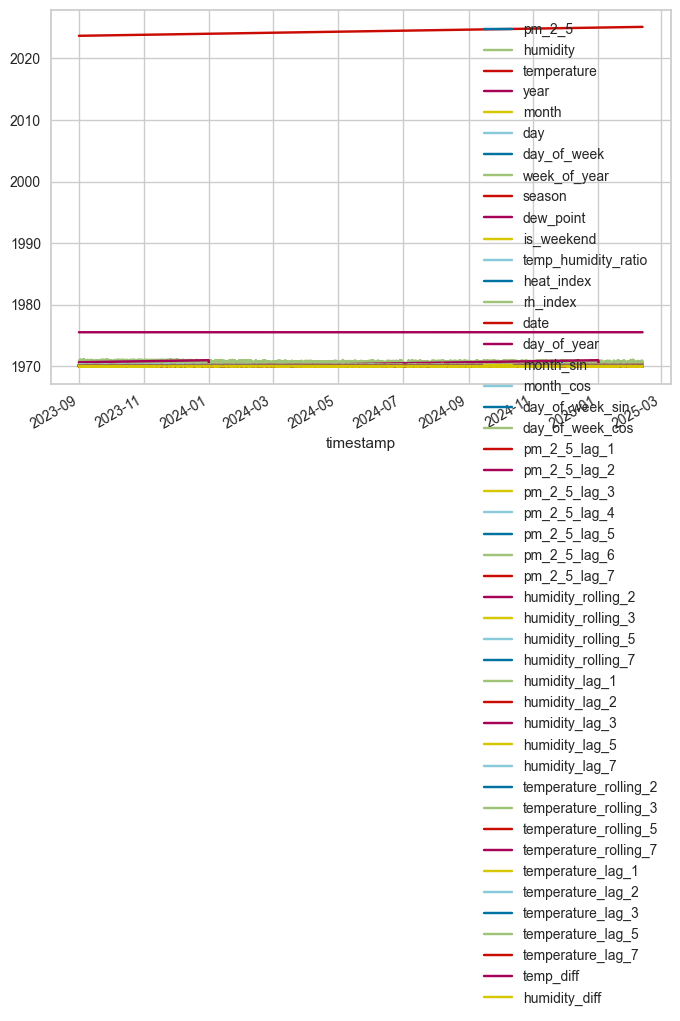

In [151]:
data_filtered.plot()

In [152]:
# สมมติว่า data มีจำนวนวันทั้งหมด
total_data = len(data_filtered)

# จำนวนวันที่ต้องการเป็น test data
test_days = 7

# คำนวณสัดส่วนของ 30 วันในข้อมูลทั้งหมด
test_size = test_days / total_data
test_size

0.0006056411143796505

In [153]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_filtered, test_size=test_size, shuffle=False)

In [154]:
train_data.shape

(11551, 47)

In [155]:
test_data.shape

(7, 47)

In [156]:
test_data.head(1)

,pm_2_5,humidity,temperature,year,month,day,day_of_week,week_of_year,season,dew_point,...,temperature_rolling_3,temperature_rolling_5,temperature_rolling_7,temperature_lag_1,temperature_lag_2,temperature_lag_3,temperature_lag_5,temperature_lag_7,temp_diff,humidity_diff
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-02-10 21:00:00,28.533333,77.279939,26.32362,2025,2,10,0,7,0,21.779608,...,27.320713,28.278832,29.059882,26.503902,27.168525,28.289712,30.294568,31.098929,-0.180283,1.145314


In [157]:
test_data.tail(2)

,pm_2_5,humidity,temperature,year,month,day,day_of_week,week_of_year,season,dew_point,...,temperature_rolling_3,temperature_rolling_5,temperature_rolling_7,temperature_lag_1,temperature_lag_2,temperature_lag_3,temperature_lag_5,temperature_lag_7,temp_diff,humidity_diff
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-02-11 11:00:00,21.85,64.332405,30.593716,2025,2,11,1,7,0,23.460197,...,26.144445,26.193347,26.377023,28.852626,25.896389,23.684319,26.323620,27.168525,1.741090,-7.714331
2025-02-11 11:15:36,21.00,61.046112,31.861472,2025,2,11,1,7,0,24.070694,...,28.447577,27.047367,26.866336,30.593716,28.852626,25.896389,26.209783,26.503902,1.267756,-3.286293


In [158]:
# from pycaret.time_series import *
from pycaret.regression import RegressionExperiment
exp1 = RegressionExperiment()
exp1.setup(data=train_data, target='pm_2_5', fold=12, session_id=123, iterative_imputation_iters=100, remove_outliers = True)

,Description,Value
0,Session id,123
1,Target,pm_2_5
2,Target type,Regression
3,Original data shape,"(11551, 47)"
4,Transformed data shape,"(11146, 49)"
5,Transformed train set shape,"(7680, 49)"
6,Transformed test set shape,"(3466, 49)"
7,Numeric features,45
8,Date features,1
9,Rows with missing values,0.3%


In [159]:
# compare baseline models
best = exp1.compare_models(n_select=17)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.1439,24.2302,4.9130,0.8602,0.2619,0.2165,0.1608
gbr,Gradient Boosting Regressor,3.1942,25.1766,5.0083,0.8547,0.2669,0.2254,1.0167
et,Extra Trees Regressor,3.2494,25.9587,5.0854,0.8502,0.2784,0.2364,0.9908
rf,Random Forest Regressor,3.2822,26.7391,5.1610,0.8456,0.2789,0.2347,3.1217
br,Bayesian Ridge,3.2967,28.7811,5.2985,0.8348,0.2802,0.2396,0.0433
ridge,Ridge Regression,3.3096,28.9177,5.3111,0.8340,0.2824,0.2422,0.0450
lr,Linear Regression,3.3323,30.0958,5.4179,0.8274,0.2832,0.2431,0.3583
en,Elastic Net,3.3819,30.1107,5.4310,0.8270,0.2874,0.2490,0.0433
llar,Lasso Least Angle Regression,3.3851,30.1647,5.4383,0.8266,0.2872,0.2491,0.0425
lasso,Lasso Regression,3.3851,30.1642,5.4383,0.8266,0.2872,0.2491,0.0467


In [160]:
model_1 = exp1.create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.1307,21.9731,4.6876,0.8681,0.2585,0.2174
1,3.3804,32.3406,5.6869,0.8274,0.2969,0.2580
2,3.2483,24.7336,4.9733,0.8614,0.2846,0.2351
3,3.2546,27.3607,5.2307,0.8362,0.2710,0.2257
4,3.1749,23.4072,4.8381,0.8626,0.2626,0.2221
5,3.2318,24.8137,4.9813,0.8641,0.3057,0.2658
6,3.3412,25.0007,5.0001,0.8457,0.2780,0.2395
7,3.1822,22.4970,4.7431,0.8775,0.2651,0.2206
8,3.2573,26.7920,5.1761,0.8495,0.2709,0.2342


In [161]:
exp1.evaluate_model(model_1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [162]:
tune_1 = exp1.tune_model(model_1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.2514,23.2059,4.8173,0.8607,0.2715,0.2376
1,3.5602,35.8141,5.9845,0.8089,0.3087,0.2759
2,3.2953,24.5996,4.9598,0.8621,0.2894,0.2478
3,3.4137,28.3283,5.3224,0.8304,0.2840,0.2424
4,3.3790,25.4286,5.0427,0.8508,0.2826,0.2506
5,3.3619,26.7650,5.1735,0.8534,0.3126,0.2813
6,3.5264,27.0651,5.2024,0.8329,0.2963,0.2632
7,3.3616,24.7744,4.9774,0.8650,0.2751,0.2380
8,3.5524,29.4108,5.4232,0.8348,0.2905,0.2659


Fitting 12 folds for each of 10 candidates, totalling 120 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [163]:
# model_2 = exp1.create_model('huber')

In [164]:
# blend = exp1.blend_models([model_1, model_2])

In [165]:
# tune = exp1.tune_model(blend)

In [166]:
new_data = test_data.copy().drop(['pm_2_5'], axis=1)
predictions = exp1.predict_model(model_1, data=new_data)
predictions

,humidity,temperature,year,month,day,day_of_week,week_of_year,season,dew_point,is_weekend,...,temperature_rolling_5,temperature_rolling_7,temperature_lag_1,temperature_lag_2,temperature_lag_3,temperature_lag_5,temperature_lag_7,temp_diff,humidity_diff,prediction_label
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-02-10 21:00:00,77.279938,26.323620,2025,2,10,0,7,0,21.779608,0,...,28.278831,29.059881,26.503902,27.168526,28.289711,30.294567,31.098928,-0.180283,1.145314,27.789090
2025-02-10 22:00:00,78.573502,26.209784,2025,2,10,0,7,0,21.924484,0,...,27.484642,28.377695,26.323620,26.503902,27.168526,29.137453,30.926083,-0.113837,1.293566,27.697362
2025-02-11 08:00:00,90.929749,23.684319,2025,2,11,1,7,0,21.870268,0,...,26.899109,27.703938,26.209784,26.323620,26.503902,28.289711,30.294567,-2.525465,12.356242,35.251804
2025-02-11 09:00:00,83.511566,25.896389,2025,2,11,1,7,0,22.598703,0,...,25.978029,26.759617,23.684319,26.209784,26.323620,27.168526,29.137453,2.212071,-7.418178,32.413781
2025-02-11 10:00:00,72.046738,28.852625,2025,2,11,1,7,0,23.261972,0,...,25.723602,26.296608,25.896389,23.684319,26.209784,26.503902,28.289711,2.956237,-11.464833,30.742322
2025-02-11 11:00:00,64.332405,30.593716,2025,2,11,1,7,0,23.460197,0,...,26.193348,26.377024,28.852625,25.896389,23.684319,26.323620,27.168526,1.741090,-7.714331,21.058793
2025-02-11 11:15:36,61.046112,31.861471,2025,2,11,1,7,0,24.070694,0,...,27.047367,26.866337,30.593716,28.852625,25.896389,26.209784,26.503902,1.267756,-3.286294,20.576246


In [167]:
predict_v = predictions['prediction_label']
predict_v.head(7)

timestamp
2025-02-10 21:00:00    27.789090
2025-02-10 22:00:00    27.697362
2025-02-11 08:00:00    35.251804
2025-02-11 09:00:00    32.413781
2025-02-11 10:00:00    30.742322
2025-02-11 11:00:00    21.058793
2025-02-11 11:15:36    20.576246
Name: prediction_label, dtype: float64

In [168]:
real = test_data['pm_2_5']
real.head(7)

timestamp
2025-02-10 21:00:00    28.533333
2025-02-10 22:00:00    31.325581
2025-02-11 08:00:00    37.568627
2025-02-11 09:00:00    38.800000
2025-02-11 10:00:00    23.333333
2025-02-11 11:00:00    21.850000
2025-02-11 11:15:36    21.000000
Name: pm_2_5, dtype: float64

In [169]:
# สมมุติว่า result คือ DataFrame ที่รวม predictions กับ pm_10
result = pd.concat([predict_v, test_data['pm_2_5']], axis=1)
result.columns = ['Predictions', 'Actual PM2_5']  # ตั้งชื่อคอลัมน์

# ทำนาย 1 วันข้างหน้า ต้องทำนายเผื่อ 2 วัน

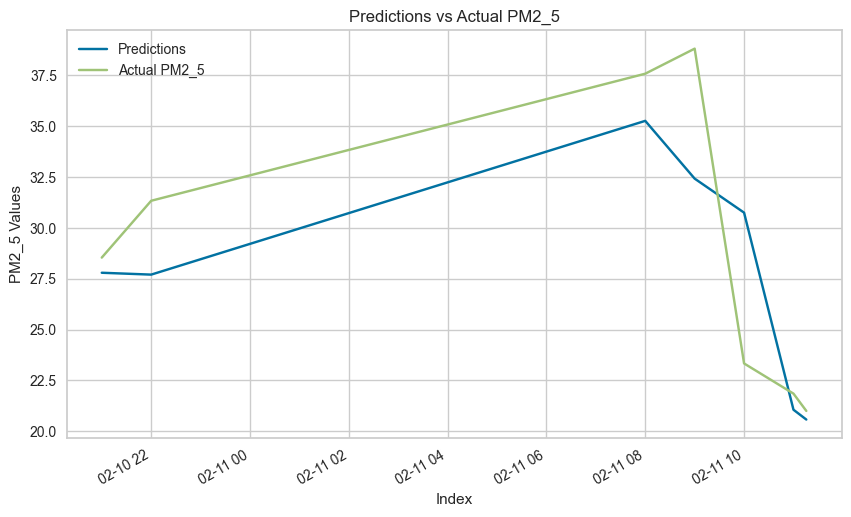

In [170]:
import pandas as pd
import matplotlib.pyplot as plt

# สมมุติว่า result คือ DataFrame ที่รวม predictions กับ pm_10
result = pd.concat([predict_v, test_data['pm_2_5']], axis=1)
result.columns = ['Predictions', 'Actual PM2_5']  # ตั้งชื่อคอลัมน์

# พล็อตข้อมูล
result.plot(figsize=(10, 6))

# ตั้งชื่อกราฟ
plt.title('Predictions vs Actual PM2_5')
plt.xlabel('Index')
plt.ylabel('PM2_5 Values')

# แสดงกราฟ
plt.show()

In [171]:
# import pandas as pd
# from sklearn.metrics import mean_absolute_percentage_error, r2_score

# # สร้าง result จากการ shift ค่าทำนาย
# result = pd.concat([predict_v.shift(-1), test_data['pm_10']], axis=1)
# result.columns = ['predicted', 'actual']

# # ลบแถวที่มีค่า NaN
# result = result.dropna()

# # คำนวณ MAPE
# mape = mean_absolute_percentage_error(result['actual'], result['predicted']) * 100

# # คำนวณ R2
# r2 = r2_score(result['actual'], result['predicted'])

# print(f'MAPE: {mape}%')
# print(f'R²: {r2}')


In [172]:
# MAPE
# from itertools import combinations

# best_list = list(best)
# # เก็บชื่อโมเดลและอ็อบเจกต์ไว้ใน dict
# model_names = {model.__class__.__name__: model for model in best_list}

# # Dictionary เก็บค่า MAPE
# mape_results = {}

# loop = 1
# # วนลูปเลือกโมเดลทีละคู่
# for model1_name, model2_name in combinations(model_names.keys(), 2):
#     print(f"{loop} --> Blending: {model1_name} + {model2_name}")  # แสดงว่ากำลังประมวลผลคู่ไหน

#     # นำโมเดลทั้งสองมาผสมกัน
#     blended_model = exp1.blend_models([model_names[model1_name], model_names[model2_name]], verbose=False)
    
#     # ดึงค่าประเมินผลล่าสุด
#     result = exp1.pull()
#     # ตรวจสอบว่ามีคอลัมน์ 'MAPE' หรือไม่
#     if 'MAPE' in result.columns and 'Mean' in result.index:
#         mape_value = result.loc['Mean', 'MAPE']
#     elif 'R2' in result.columns and 'Mean' in result.index:
#         mape_value = result.loc['Mean', 'R2']
#     else:
#         print(f"❌ ไม่มีค่าที่ต้องการสำหรับ {model1_name} + {model2_name}")
#         continue  # ข้ามรอบนี้ถ้าไม่มีค่า MAPE หรือ R2

#     # บันทึกค่าลง dictionary
#     mape_results[f"{model1_name}, {model2_name}"] = mape_value

#     print('-'* 60)
#     loop += 1

In [173]:
# R2
# from itertools import combinations

# best_list = list(best)
# # เก็บชื่อโมเดลและอ็อบเจกต์ไว้ใน dict
# model_names = {model.__class__.__name__: model for model in best_list}

# # Dictionary เก็บค่า R2
# r2_results = {}

# loop = 1
# # วนลูปเลือกโมเดลทีละคู่
# for model1_name, model2_name in combinations(model_names.keys(), 2):
#     print(f"{loop} --> Blending: {model1_name} + {model2_name}")  # แสดงว่ากำลังประมวลผลคู่ไหน

#     # นำโมเดลทั้งสองมาผสมกัน
#     blended_model = exp1.blend_models([model_names[model1_name], model_names[model2_name]], verbose=False)
    
#     # ดึงค่าประเมินผลล่าสุด
#     result = exp1.pull()
    
#     # ตรวจสอบว่ามีคอลัมน์ 'R2' หรือไม่
#     if 'R2' in result.columns and 'Mean' in result.index:
#         r2_value = result.loc['Mean', 'R2']
#     else:
#         print(f"❌ ไม่มีค่า R2 สำหรับ {model1_name} + {model2_name}")
#         continue  # ข้ามรอบนี้ถ้าไม่มีค่า R2

#     # บันทึกค่าลง dictionary
#     r2_results[f"{model1_name}, {model2_name}"] = r2_value

#     print('-'* 60)
#     loop += 1


In [174]:
# print("\nผลลัพธ์ของการ Blend Models:")
# for blend, score in sorted(mape_results.items(), key=lambda x: x[1]):  # เรียงจาก R² สูงสุด
#     print(f"{blend}: {score}")

# Predict 1 by 1

In [178]:
data_compare = data_filtered.loc[:'2025-02-10 20:00:00']
result = pd.DataFrame()

start_date = "2025-02-10 21:00:00"
end_date = "2025-02-11 11:00:00"

for date in pd.date_range(start=start_date, end=end_date, freq="H"):
    # ตรวจสอบว่า date มีข้อมูลใน data_filtered หรือไม่
    if date in data_filtered.index:
        # Drop columns
        test_1 = data_filtered.drop(columns=['pm_2_5', 'pm_2_5_lag_1', 'pm_2_5_lag_2', 'pm_2_5_lag_3', 'pm_2_5_lag_4',
        'pm_2_5_lag_5', 'pm_2_5_lag_6', 'pm_2_5_lag_7'])

        # test_1.colu
        
        # ดึงวันนี้มา
        test_1 = test_1.loc[[date]]  # เลือกข้อมูลเป็น DataFrame แทน Series
        # # ใส่เข้าไป
        data_compare = pd.concat([data_compare, test_1], axis=0)
        
        # คำนวณ
        data_compare['pm_2_5_lag_1'] = data_compare['pm_2_5'].shift(1)
        data_compare['pm_2_5_lag_2'] = data_compare['pm_2_5'].shift(2)
        data_compare['pm_2_5_lag_3'] = data_compare['pm_2_5'].shift(3)
        data_compare['pm_2_5_lag_4'] = data_compare['pm_2_5'].shift(4)
        data_compare['pm_2_5_lag_5'] = data_compare['pm_2_5'].shift(5)
        data_compare['pm_2_5_lag_6'] = data_compare['pm_2_5'].shift(6)
        data_compare['pm_2_5_lag_7'] = data_compare['pm_2_5'].shift(7)

        # ดึง
        test_1 = (data_compare.loc[[date]]).drop(columns=['pm_2_5'])

        # Drop ทิ้งล่าสุดใน data_compare
        data_compare = data_compare.drop(data_compare.last_valid_index())
        test_1 = test_1[~test_1.index.duplicated(keep='last')]

        # # Predict
        predict_test_1 = exp1.predict_model(model_1, data=test_1)
        
        # เพิ่มผลทำนายเข้าไปใน data_compare
        data_compare = pd.concat([data_compare, predict_test_1], axis=0)

        data_compare.loc[date, 'pm_2_5'] = data_compare.loc[date, 'prediction_label']

        # ลบคอลัมน์ 'prediction_label' (หากต้องการแค่ผลทำนาย)
        data_compare = data_compare.drop(columns=['prediction_label'])

        # กรองเอาวันที่ซ้ำกัน (index ซ้ำ) ออกให้เหลือแค่ตัวเดียว
        data_compare = data_compare[~data_compare.index.duplicated(keep='last')]

        # บันทึกลง result
        result = pd.concat([result, predict_test_1], axis=0)

In [179]:
data_compare.tail(1)

,pm_2_5,humidity,temperature,year,month,day,day_of_week,week_of_year,season,dew_point,...,temperature_rolling_3,temperature_rolling_5,temperature_rolling_7,temperature_lag_1,temperature_lag_2,temperature_lag_3,temperature_lag_5,temperature_lag_7,temp_diff,humidity_diff
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-02-11 11:00:00,24.663395,64.332405,30.593716,2025,2,11,1,7,0,23.460197,...,26.144445,26.193348,26.377024,28.852625,25.896389,23.684319,26.32362,27.168526,1.74109,-7.714331


In [180]:
result

,humidity,temperature,year,month,day,day_of_week,week_of_year,season,dew_point,is_weekend,...,temperature_rolling_5,temperature_rolling_7,temperature_lag_1,temperature_lag_2,temperature_lag_3,temperature_lag_5,temperature_lag_7,temp_diff,humidity_diff,prediction_label
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-02-10 21:00:00,77.279938,26.323620,2025,2,10,0,7,0,21.779608,0,...,28.278831,29.059881,26.503902,27.168526,28.289711,30.294567,31.098928,-0.180283,1.145314,27.789090
2025-02-10 22:00:00,78.573502,26.209784,2025,2,10,0,7,0,21.924484,0,...,27.484642,28.377695,26.323620,26.503902,27.168526,29.137453,30.926083,-0.113837,1.293566,27.422194
2025-02-11 08:00:00,90.929749,23.684319,2025,2,11,1,7,0,21.870268,0,...,26.899109,27.703938,26.209784,26.323620,26.503902,28.289711,30.294567,-2.525465,12.356242,33.604449
2025-02-11 09:00:00,83.511566,25.896389,2025,2,11,1,7,0,22.598703,0,...,25.978029,26.759617,23.684319,26.209784,26.323620,27.168526,29.137453,2.212071,-7.418178,30.598836
2025-02-11 10:00:00,72.046738,28.852625,2025,2,11,1,7,0,23.261972,0,...,25.723602,26.296608,25.896389,23.684319,26.209784,26.503902,28.289711,2.956237,-11.464833,27.051645
2025-02-11 11:00:00,64.332405,30.593716,2025,2,11,1,7,0,23.460197,0,...,26.193348,26.377024,28.852625,25.896389,23.684319,26.323620,27.168526,1.741090,-7.714331,24.663395


In [182]:
data_compare.tail(7)[['pm_2_5', 'pm_2_5_lag_1', 'pm_2_5_lag_2', 'pm_2_5_lag_3', 'pm_2_5_lag_4',
        'pm_2_5_lag_5', 'pm_2_5_lag_6', 'pm_2_5_lag_7']]

,pm_2_5,pm_2_5_lag_1,pm_2_5_lag_2,pm_2_5_lag_3,pm_2_5_lag_4,pm_2_5_lag_5,pm_2_5_lag_6,pm_2_5_lag_7
timestamp,,,,,,,,
2025-02-10 20:00:00,28.383333,28.883333,27.033333,26.355932,25.416667,25.450000,25.183333,25.016667
2025-02-10 21:00:00,27.789090,28.383333,28.883333,27.033333,26.355932,25.416667,25.450000,25.183333
2025-02-10 22:00:00,27.422194,27.789090,28.383333,28.883333,27.033333,26.355932,25.416667,25.450000
2025-02-11 08:00:00,33.604449,27.422194,27.789090,28.383333,28.883333,27.033333,26.355932,25.416667
2025-02-11 09:00:00,30.598836,33.604449,27.422194,27.789090,28.383333,28.883333,27.033333,26.355932
2025-02-11 10:00:00,27.051645,30.598836,33.604449,27.422194,27.789090,28.383333,28.883333,27.033333
2025-02-11 11:00:00,24.663395,27.051645,30.598835,33.604450,27.422194,27.789089,28.383333,28.883333


In [188]:
real_data = data_filtered.loc[start_date:end_date]
real_data.tail(7)[[ 'pm_2_5_lag_1', 'pm_2_5_lag_2', 'pm_2_5_lag_3', 'pm_2_5_lag_4',
        'pm_2_5_lag_5', 'pm_2_5_lag_6', 'pm_2_5_lag_7']]

,pm_2_5_lag_1,pm_2_5_lag_2,pm_2_5_lag_3,pm_2_5_lag_4,pm_2_5_lag_5,pm_2_5_lag_6,pm_2_5_lag_7
timestamp,,,,,,,
2025-02-10 21:00:00,28.383333,28.883333,27.033333,26.355932,25.416667,25.450000,25.183333
2025-02-10 22:00:00,28.533333,28.383333,28.883333,27.033333,26.355932,25.416667,25.450000
2025-02-11 08:00:00,31.325581,28.533333,28.383333,28.883333,27.033333,26.355932,25.416667
2025-02-11 09:00:00,37.568627,31.325581,28.533333,28.383333,28.883333,27.033333,26.355932
2025-02-11 10:00:00,38.800000,37.568627,31.325581,28.533333,28.383333,28.883333,27.033333
2025-02-11 11:00:00,23.333333,38.800000,37.568627,31.325581,28.533333,28.383333,28.883333


In [189]:
test_data

,pm_2_5,humidity,temperature,year,month,day,day_of_week,week_of_year,season,dew_point,...,temperature_rolling_3,temperature_rolling_5,temperature_rolling_7,temperature_lag_1,temperature_lag_2,temperature_lag_3,temperature_lag_5,temperature_lag_7,temp_diff,humidity_diff
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-02-10 21:00:00,28.533333,77.279939,26.323620,2025,2,10,0,7,0,21.779608,...,27.320713,28.278832,29.059882,26.503902,27.168525,28.289712,30.294568,31.098929,-0.180283,1.145314
2025-02-10 22:00:00,31.325581,78.573505,26.209783,2025,2,10,0,7,0,21.924484,...,26.665349,27.484642,28.377695,26.323620,26.503902,27.168525,29.137454,30.926083,-0.113837,1.293566
2025-02-11 08:00:00,37.568627,90.929747,23.684319,2025,2,11,1,7,0,21.870268,...,26.345768,26.899108,27.703938,26.209783,26.323620,26.503902,28.289712,30.294568,-2.525465,12.356242
2025-02-11 09:00:00,38.800000,83.511569,25.896389,2025,2,11,1,7,0,22.598703,...,25.405907,25.978030,26.759616,23.684319,26.209783,26.323620,27.168525,29.137454,2.212071,-7.418178
2025-02-11 10:00:00,23.333333,72.046736,28.852626,2025,2,11,1,7,0,23.261973,...,25.263497,25.723603,26.296607,25.896389,23.684319,26.209783,26.503902,28.289712,2.956236,-11.464833
2025-02-11 11:00:00,21.850000,64.332405,30.593716,2025,2,11,1,7,0,23.460197,...,26.144445,26.193347,26.377023,28.852626,25.896389,23.684319,26.323620,27.168525,1.741090,-7.714331
2025-02-11 11:15:36,21.000000,61.046112,31.861472,2025,2,11,1,7,0,24.070694,...,28.447577,27.047367,26.866336,30.593716,28.852626,25.896389,26.209783,26.503902,1.267756,-3.286293


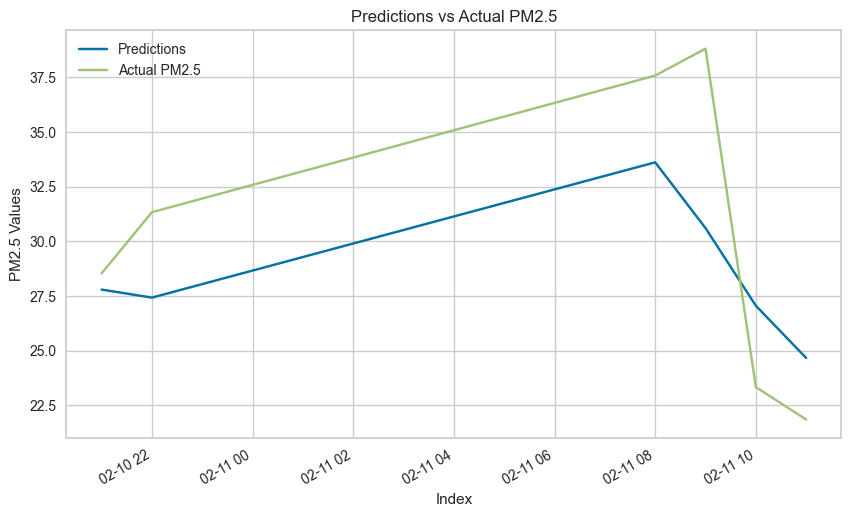

In [190]:
import pandas as pd
import matplotlib.pyplot as plt

real_data = data_filtered.loc[start_date:end_date]
# สมมุติว่า result คือ DataFrame ที่รวม predictions กับ pm_2_5
result_plot = pd.concat([result['prediction_label'], real_data['pm_2_5']], axis=1)
result_plot.columns = ['Predictions', 'Actual PM2.5']  # ตั้งชื่อคอลัมน์

# พล็อตข้อมูล
result_plot.plot(figsize=(10, 6))

# ตั้งชื่อกราฟ
plt.title('Predictions vs Actual PM2.5')
plt.xlabel('Index')
plt.ylabel('PM2.5 Values')

# แสดงกราฟ
plt.show()

In [192]:
real_data['pm_2_5']

timestamp
2025-02-10 21:00:00    28.533333
2025-02-10 22:00:00    31.325581
2025-02-11 08:00:00    37.568627
2025-02-11 09:00:00    38.800000
2025-02-11 10:00:00    23.333333
2025-02-11 11:00:00    21.850000
Name: pm_2_5, dtype: float64

In [195]:
result['prediction_label']

timestamp
2025-02-10 21:00:00    27.789090
2025-02-10 22:00:00    27.422194
2025-02-11 08:00:00    33.604449
2025-02-11 09:00:00    30.598836
2025-02-11 10:00:00    27.051645
2025-02-11 11:00:00    24.663395
Name: prediction_label, dtype: float64

In [ ]:
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_true = real_data["pm_2_5"]
y_pred = result['pm_2_5_lag_7']# "prediction_label" contains predictions

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate Accuracy as (1 - (MAE / mean_actual)) * 100
mean_actual = np.mean(y_true)  # Mean of actual values
accuracy = (1 - (mae / mean_actual)) * 100  # Accuracy in percentage

# Print Results
print(f"R² Score: {r2:.4f}")  # Closer to 1 is better
print(f"Mean Absolute Error (MAE): {mae:.4f}")  # Lower is better
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")  # Lower is better
print(f"Accuracy: {accuracy:.2f}%")  # Accuracy percentage

R² Score: -0.6512
Mean Absolute Error (MAE): 7.4258
Root Mean Squared Error (RMSE): 8.2808
Accuracy: 75.44%
